### We will include Validation set of data along with Training set here

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip
    

--2020-05-12 12:40:34--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   143MB/s    in 1.0s    

2020-05-12 12:40:35 (143 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-05-12 12:40:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  56.1MB/s    in 0.2s    

2020-05-12 12:40:37 (56.1 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [3]:
import os, zipfile

In [4]:
## Training set
batch_pathfile='/tmp/horse-or-human.zip'
batch_path='/tmp/horse-or-human'
zip_file=zipfile.ZipFile(batch_pathfile,'r')
zip_file.extractall(batch_path)
zip_file.close()

In [7]:
### Validation set
validation_path='/tmp/validation-horse-or-human.zip'
validation_zip=zipfile.ZipFile(validation_path,'r')
validation_zip.extractall('/tmp/validation-horse-or-human')
validation_zip.close()

In [8]:
training_paths=os.listdir(batch_path)

In [9]:
training_paths

['humans', 'horses']

In [10]:
training_horse=os.path.join(batch_path,'humans')

In [12]:
list_horses=os.listdir(training_horse)

In [15]:
list_horses[:5]

['human15-29.png',
 'human06-12.png',
 'human15-18.png',
 'human08-28.png',
 'human13-30.png']

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow import keras

In [18]:
sample_img_path=os.path.join(training_horse,list_horses[5])

In [19]:
sample_image=plt.imread(sample_img_path)

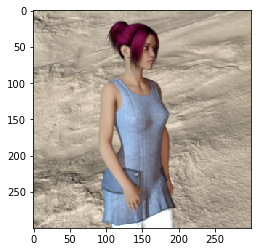

In [21]:
plt.imshow(sample_image)

In [ ]:
model=keras.Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),padding='SAME',input_shape=(300,300,3)))